In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential

LOAD THE DATASET

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.dtype, x_train.shape, y_train.dtype, y_train.shape 

(dtype('uint8'), (60000, 28, 28), dtype('uint8'), (60000,))

MAKE DATA COMPATIBLE WITH KERAS

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
x_train.dtype, x_train.shape, y_train.dtype, y_train.shape 

(dtype('float32'), (60000, 28, 28, 1), dtype('float32'), (60000, 10))

In [8]:
train = (x_train, y_train)
test = (x_test, y_test)

In [9]:
import matplotlib.pyplot as plt

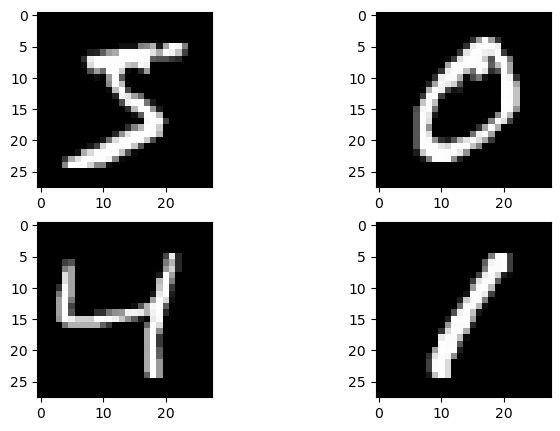

In [10]:
fig, axes = plt.subplots(2, 2, figsize = (8, 5))
for i in range(len(axes)):
    for j in range(len(axes)):
        axes[i][j].imshow(train[0][i*len(axes)+j].reshape(28, 28), cmap = 'gray')

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

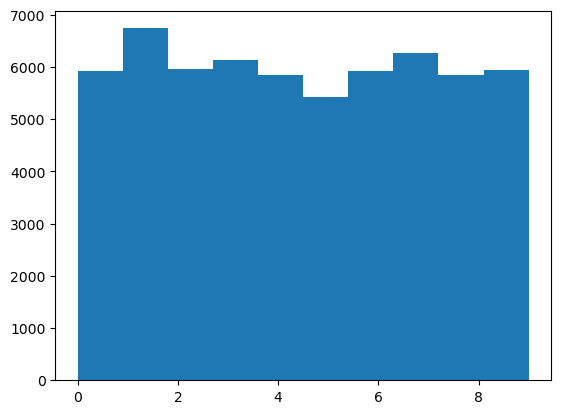

In [11]:
plt.hist(np.argmax(y_train, axis=1))

## SET UP THE MODEL

In [1]:
model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    Conv2D(32, (3, 3), activation = "relu"),
    Conv2D(32, (3, 3), activation = "relu"),
    Flatten(),
    Dense(10, activation = "softmax")
])
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
inputs = layers.Input(shape = (train[0][0].shape))
x = layers.Conv2D(3, 3, activation = "relu")(inputs)
x = layers.Conv2D(3, 3, activation = "relu")(x)
x = layers.Conv2D(3, 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = "softmax")(x)

model = keras.Model(inputs, outputs)
model.summary()

Compile The Model

In [ ]:
y_train

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss =keras.losses.SparseCategoricalCrossentropy(), 
    metrics = ["accuracy"]
)

In [ ]:
## Train the Model

In [ ]:
history = model.fit(x = train[0], y=train[1], batch_size=32, epochs = 5, validation_split = 0.2)